# EDA

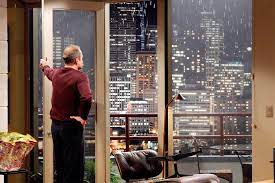

The purpose of this EDA is to find insights in the data of the housing market around Seattle to be able to answer some hypothesis and give help to one chosen stakeholder.
The Source of the data you can find here: **Source**

At the very beginning we import all required tools and libraries to be prepared for the further steps in the process.

In [606]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Understand your Data
Firstly we start our EDA by reading in our data and get some basic information for our dataset. Therefore we import our dataset into a dataframe and have a basic look at it.

In [594]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.head(60)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


Now we need to know what information the different columns contain and have a look at the shape of our dataset, meaning how long and wide it is. Also we check which Datatype there are.

In [550]:
# checking the rows and columns
df.shape

0

In [291]:
#get some general Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Checking the data and have a look on Data types: 
* **Object:** We have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns. For some this is true - however talking about selling date or **sqft_basement** we need to change our data-types into a date format later on. 
<br>

* **int64:** Furthermore we have integers for the id, bedrooms, sqft_living/sqft_lot, zipcode and some others. This makes sense, since we are expecting numerical values in these columns.
<br>

* **float64:** Additionally we have floats for some of these. This makes also sense for columns like long and lat to calculate the geographical location of the house. For others like floors, yr_renovated or the bathrooms in contrast, it is a little off. So we have to keep that in mind for later steps in exploring and cleaning the data.
<br>
In this Table we can already see that our dataset is at a good basic starting point because there are no major gaps and no important data values are missing. Nevertheless we have different kinds of data types in our dataset to consider.
So generally we see the data is complete (it has no missing values) and is correct (has no obvious logical problems that defy our understanding of the content).

## Initial Hypotheses about the Dataset
<br>
After browsing through our data and figuring out, what data we have in front of us, i now want to build some hypotheses in relation to our expectations, about what is contained in the data.
The Following Hypotheses i will try to investigate in the upcoming steps:
<br>

1. The number of rooms tend to contribute to the selling price
2. The more actual living space the more the price increases
3. Depending on the location/the zip-code there is a pattern in selling prices
4. Houses with better grades tend to have recently been renovated 
5. There are times during the year in which selling prices tend to be higher

I also want to have a clearer view of the data to be able to give some action recommendation to my chosen stakeholder Bonnie Brown.

    But who is Bonnie Brown??
* She is a **Seller**
* **She Has a house and wants to move soon** (so timing might be important)
* **She wants high profit** (as high as possible) in middle class Neighborhood
<br>

So finally we have to find some insights to help achieve these goals of the stakeholder.

## Exploration of the Data
<br>
To begin with our exploration we want to have a look at our numerical based columns to find some clues in it. We do it preferably with a histogram plot.

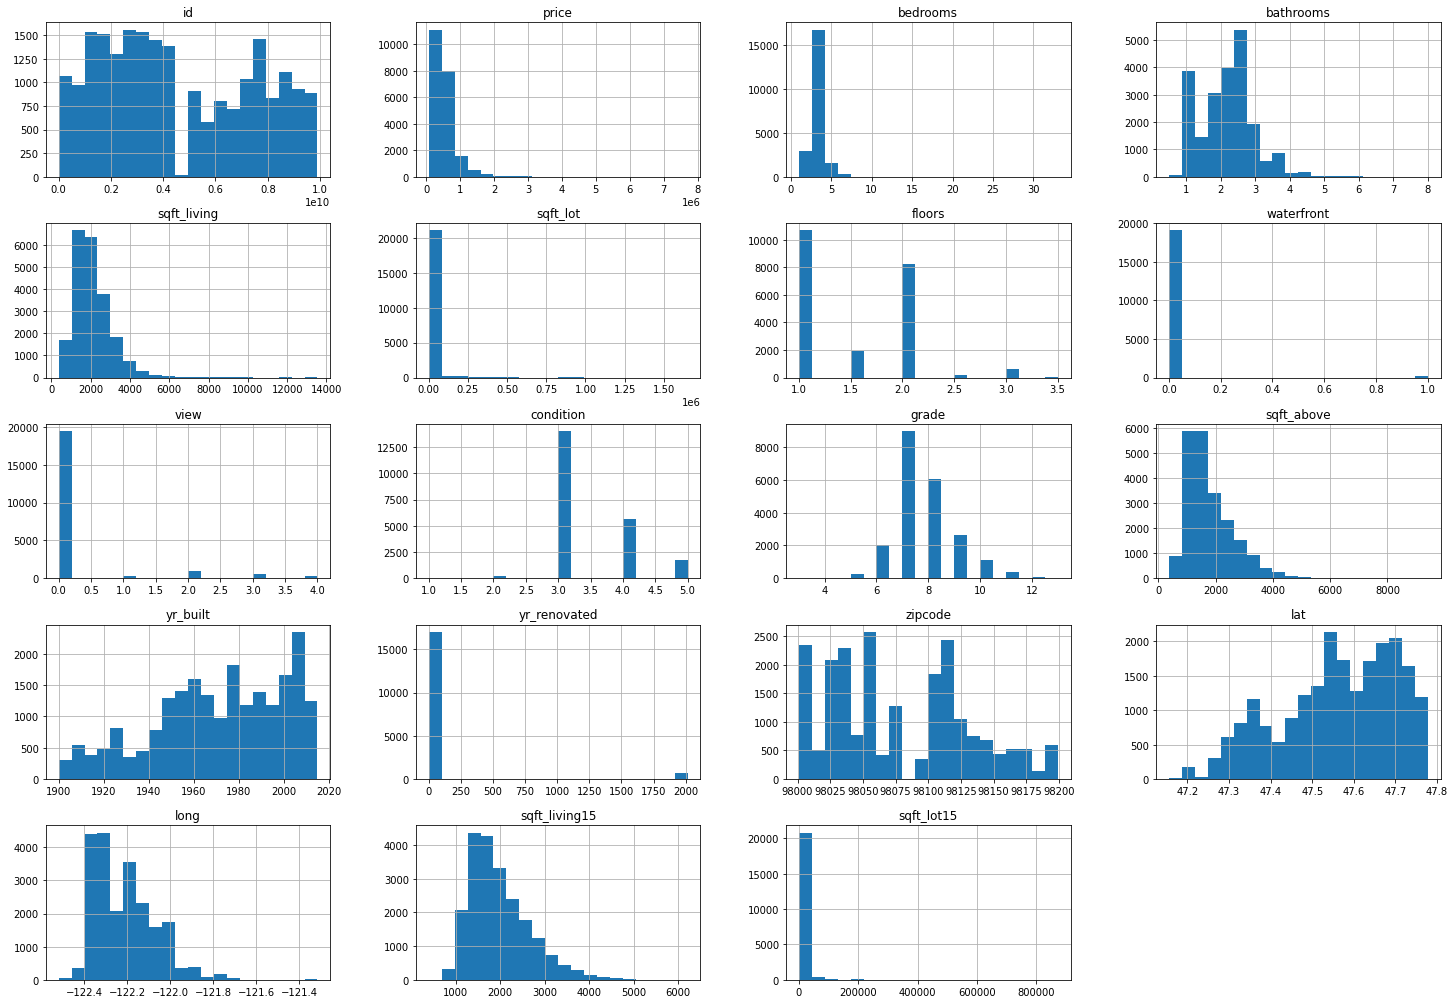

In [292]:
# Save names of all numerical columns in list
#column_num = df.select_dtypes(include=np.number).columns
#print(column_num)

#Plot histograms of all numerical columns
df.hist(bins=20, figsize=(25, 25), layout=(7, 4));

In the plots we can instantly see that some continous features of the dataset share a kind of normal distribution like for example the price or the actual living space of the houses. But we have also some categorical features like grade and condition which are also distributed in a similar kind.

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


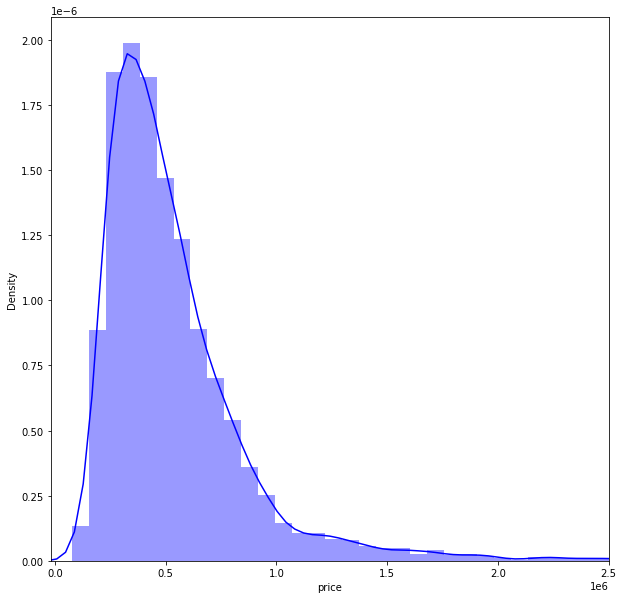

In [306]:
print(df['price'].describe())
plt.figure(figsize=(10, 10))
plt.xlim(-20000, 2500000) 
sns.distplot(df['price'], color='b', bins=100, hist_kws={'alpha': 0.4});

In this plot we see the most important column of the dataset and its distribution - the price. Here in this plot it gets very obvious that the price is right skewed and some outliers(extreme selling prices) lies above ~1.2 Mil. That means that our median and our mean is on the right side of the mode, which is on the top of the curve. The min and max value are relative far apart - which is expected based on the big difference in house pricing.
<br>

Based on this plot and some research on the seattle [real estate market](https://www.noradarealestate.com/blog/seattle-real-estate-market/) with strong increasing prices, i assume the "middle class" Neighborhood to be in the range of 500.000$ to a maximum of 700.000$. This is also important for some assumptions addressing my stakeholder Bonnie Brown.

In the following we are also going to check the obvious categorical columns for some patterns. We do this with the help of some popular plots. 

   condition  count
2          3  14020
3          4   5677
4          5   1701
1          2    170
0          1     29


Text(0.5, 1.0, 'Distribution of the condition')

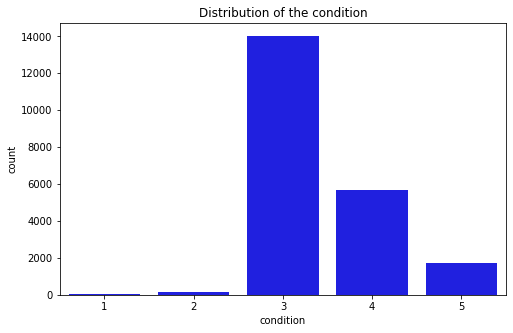

In [563]:
#count the groups for "condition" and "grade" and sort them based on their value
condition_dis = df.groupby(['condition']).count().reset_index()
condition_dis = condition_dis [['condition', 'id']].rename(columns=dict(id='count')).sort_values('count', ascending=False)

grade_dis = df.groupby(['grade']).count().reset_index()
grade_dis = grade_dis [['grade', 'id']].rename(columns=dict(id='count')).sort_values('count', ascending=False)

print(condition_dis)
sns.barplot(data=condition_dis, x="condition" , y="count" , color='b');
plt.title('Distribution of the condition')
#condition_dis.describe()


    grade  count
4       7   8974
5       8   6065
6       9   2615
3       6   2038
7      10   1134
8      11    399
2       5    242
9      12     89
1       4     27
10     13     13
0       3      1


Text(0.5, 1.0, 'Distribution of the grades')

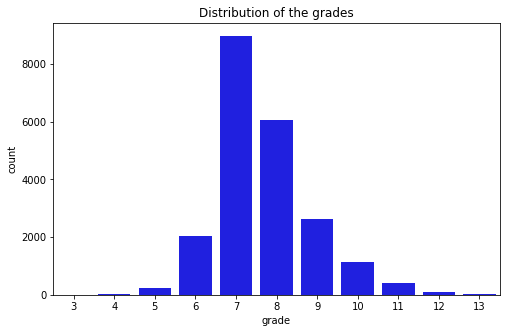

In [564]:
print(grade_dis)
sns.barplot(data=grade_dis, x="grade" , y="count" , color='b');
plt.title('Distribution of the grades')

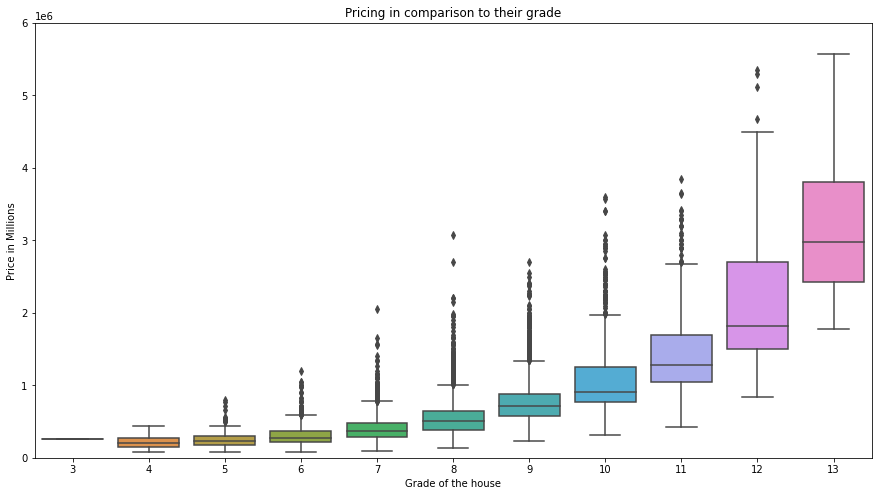

In [561]:
plt.figure(figsize = (15,8))
sns.boxplot(x=df.grade, y=df.price)
plt.title('Pricing in comparison to their grade')
plt.ylabel('Price in Mil.$')
plt.ylim(0,6e6)
plt.xlabel('Grade of the house')
plt.show()

Regarding the grade column we can clearly see in the barplot that more than 90% of the awarded grades are either **7** or **8** - the absolute midfield out of 13 possible grades. Nearly the same goes for the condition. Here are about 65% distributed to **3** and almost 30% to **4**. 
<br>

In conclusion we can say that its hard to determine a significant difference between individual houses based on these 2 groups due to the a more generous division into these. But what you can also see in the boxplot above is the connection between pricing and the grade of the house in a non linear way. Beyond that its also noticeable that some sellers were able to sell their houses for a better price than you would expect from the look at the grades. This is very obvious for the grades from **7** to **9**.

<br>
In the boxplot of the zip code distribution below you can have a glance of the wide variety of the included areas of seattle. There are also a lot of outliers which emphasizes that its quite hard to group the house prices purely based on there connected zip-code.
Nevertheless One remarkable area for a consistently good price would be the green box for the zip code of 98039, 98040 - the upscale district of medina, and also the area with the zip code of 98004.

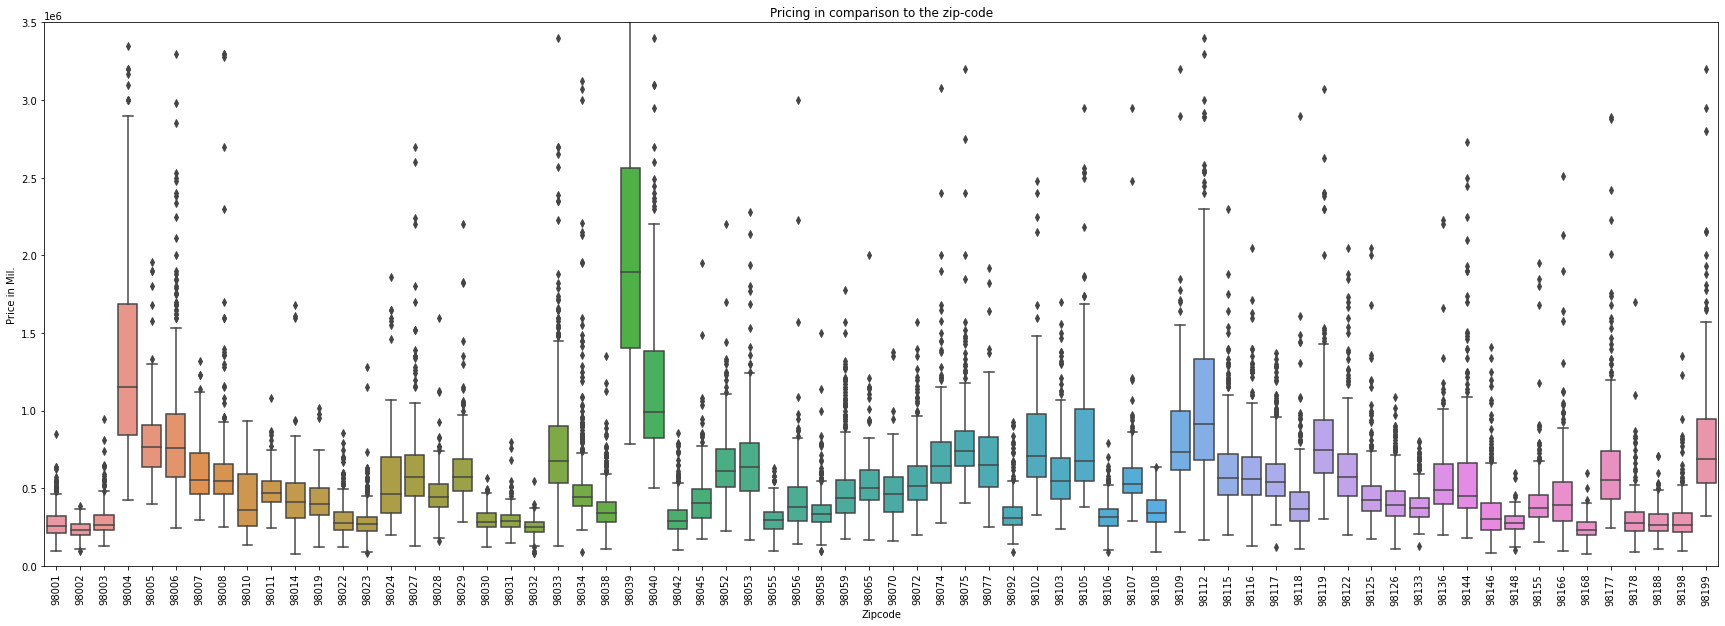

In [560]:
plt.figure(figsize = (30,10))
sns.boxplot(x=df.zipcode, y=df.price)

plt.title('Pricing in comparison to the zip-code')
plt.ylabel('Price in Mil.$')
plt.ylim(0,3.5e6)
plt.xlabel('Zipcode')
plt.xticks(rotation=90)
plt.show()

## Cleaning the data
To begin with we start with cleaning the data a little bit regarding the topics which really interests us. Therefore we drop some columns and check for duplicates.

In [314]:
houses = df.drop(["sqft_living15", "sqft_lot15", "sqft_basement", "sqft_above", "floors", "waterfront", "view", "yr_built"], axis=1, inplace=True)


In [319]:
# check for the result
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated,zipcode,lat,long
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,3,7,0.000,98178,47.511,-122.257
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,3,7,1991.000,98125,47.721,-122.319
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,3,6,NaN,98028,47.738,-122.233
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,5,7,0.000,98136,47.521,-122.393
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,3,8,0.000,98074,47.617,-122.045


In [410]:
#we have a look on the duplicates identified by the id column
df["id"].duplicated()
duplicate_id = df.groupby("id").size().to_frame('Count').reset_index()
duplicate_id = duplicate_id.sort_values('Count', ascending=False)
duplicate_id.head(5)

,id,Count
1604,795000620,3
0,1000102,2
9614,3578401060,2
9473,3528000040,2
12002,4345000510,2


In [321]:
# we check one of them to see whats going on
df.query('id == 795000620')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated,zipcode,lat,long
17588,795000620,9/24/2014,115000.000,3,1.000,1080,6250,2,5,0.000,98168,47.505,-122.330
17589,795000620,12/15/2014,124000.000,3,1.000,1080,6250,2,5,0.000,98168,47.505,-122.330
17590,795000620,3/11/2015,157000.000,3,1.000,1080,6250,2,5,NaN,98168,47.505,-122.330


During the process of cleaning we have to deal with some duplicates identified by their unique id. When we check one example of them we see, that it is the same house located by the same latitude and longitude.
Therefore we drop these duplicate rows.

In [468]:
houses = df.drop_duplicates(subset=['id'])

We also have to transform the datatype of the date to a more suitable one. In this case we use to_datetime to get a datetime out of it. Regarding the values for the date we have to keep in mind, that we are only dealing with a very limited time period. Therefore, unfortunately, only imprecise time based predictions can be made for the future.

In [469]:
houses.date = pd.to_datetime(df.date, format='%m-%d-%y')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,3,7,0.000,98178,47.511,-122.257
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,3,7,1991.000,98125,47.721,-122.319
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,3,6,NaN,98028,47.738,-122.233
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,5,7,0.000,98136,47.521,-122.393
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,3,8,0.000,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3,8,0.000,98103,47.699,-122.346
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,3,8,0.000,98146,47.511,-122.362
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,3,7,0.000,98144,47.594,-122.299
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,3,8,0.000,98027,47.535,-122.069


In [470]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21420 non-null  int64         
 1   date          21420 non-null  datetime64[ns]
 2   price         21420 non-null  float64       
 3   bedrooms      21420 non-null  int64         
 4   bathrooms     21420 non-null  float64       
 5   sqft_living   21420 non-null  int64         
 6   sqft_lot      21420 non-null  int64         
 7   condition     21420 non-null  int64         
 8   grade         21420 non-null  int64         
 9   yr_renovated  17616 non-null  float64       
 10  zipcode       21420 non-null  int64         
 11  lat           21420 non-null  float64       
 12  long          21420 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 2.3 MB


Now we also check the year of renovation for NaN values and 0. Here we see some missing data / or some some mistakes from gathering the data. We fill the NaN data with 0's and save the houses with renovation separately. They are only a few which severely limits our data. Nevertheless we will probably need them later.

In [471]:
houses.isnull().sum()
houses.isna().sum()


id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
condition          0
grade              0
yr_renovated    3804
zipcode            0
lat                0
long               0
dtype: int64

In [490]:
houses = houses.fillna(0)
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,3,7,0.000,98178,47.511,-122.257
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,3,7,1991.000,98125,47.721,-122.319
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,3,6,0.000,98028,47.738,-122.233
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,5,7,0.000,98136,47.521,-122.393
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,3,8,0.000,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3,8,0.000,98103,47.699,-122.346
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,3,8,0.000,98146,47.511,-122.362
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,3,7,0.000,98144,47.594,-122.299
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,3,8,0.000,98027,47.535,-122.069


In [496]:

houses_ren = houses[houses.yr_renovated != 0];
houses_ren

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated,zipcode,lat,long
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,3,7,1991.000,98125,47.721,-122.319
35,9547205180,2014-06-13,696000.000,3,2.500,2300,3060,3,8,2002.000,98115,47.683,-122.310
95,1483300570,2014-09-08,905000.000,4,2.500,3300,10250,3,7,1991.000,98040,47.587,-122.249
103,2450000295,2014-10-07,1090000.000,3,2.500,2920,8113,3,8,2010.000,98004,47.581,-122.196
125,4389200955,2015-03-02,1450000.000,4,2.750,2750,17789,3,8,1992.000,98004,47.614,-122.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,6392000625,2014-07-12,451000.000,2,1.000,900,6000,3,7,2004.000,98115,47.685,-122.289
20041,126039256,2014-09-04,434900.000,3,2.000,1520,5040,3,7,2006.000,98177,47.777,-122.362
20428,4305600360,2015-02-25,500012.000,4,2.500,2400,9612,3,8,2009.000,98059,47.480,-122.127
20431,3319500628,2015-02-12,356999.000,3,1.500,1010,1546,3,8,2014.000,98144,47.600,-122.311


houses.isnull().sum()

## Relationship in the data and addressing the hypothesis

We checked, prepared and cleaned the dataset so that we now can dive deeper into the hypothesis and also addressing the objects of the stakeholder. So we go ahead and try to create some knowledge and insights to share. We do this by stating our initial ideas as hypotheses that we will try to test with the data to see if we they can be confirmed or rejected.
<dr>
As a first step i want to have a look at the correlation matrix and the resulting heatmap to see, if can proof our first insights and get more connections out of it.

#### 4. Houses with better grades tend to have recently been renovated 

In [500]:
# correlation matrix between these variables
corr_columns=["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "condition", "grade", "yr_renovated"]
corr_mtrx = houses[corr_columns].corr()
corr_mtrx

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated
price,1.000,0.309,0.526,0.702,0.089,0.035,0.668,0.118
bedrooms,0.309,1.000,0.515,0.579,0.032,0.026,0.358,0.017
bathrooms,0.526,0.515,1.000,0.756,0.088,-0.129,0.666,0.048
sqft_living,0.702,0.579,0.756,1.000,0.173,-0.062,0.762,0.051
sqft_lot,0.089,0.032,0.088,0.173,1.000,-0.009,0.114,0.005
condition,0.035,0.026,-0.129,-0.062,-0.009,1.000,-0.151,-0.056
grade,0.668,0.358,0.666,0.762,0.114,-0.151,1.000,0.016
yr_renovated,0.118,0.017,0.048,0.051,0.005,-0.056,0.016,1.000


In [502]:
# correlation matrix between these variables especially for the reduced dataset only for the renovated houses
corr_columns=["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "condition", "grade", "yr_renovated"]
corr_mtrx = houses_ren[corr_columns].corr()
corr_mtrx

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_renovated
price,1.000,0.320,0.593,0.803,0.004,0.030,0.721,0.123
bedrooms,0.320,1.000,0.590,0.542,0.004,-0.008,0.361,0.157
bathrooms,0.593,0.590,1.000,0.765,0.048,-0.014,0.646,0.249
sqft_living,0.803,0.542,0.765,1.000,0.116,0.024,0.723,0.131
sqft_lot,0.004,0.004,0.048,0.116,1.000,0.032,0.019,-0.084
condition,0.030,-0.008,-0.014,0.024,0.032,1.000,0.013,-0.364
grade,0.721,0.361,0.646,0.723,0.019,0.013,1.000,0.238
yr_renovated,0.123,0.157,0.249,0.131,-0.084,-0.364,0.238,1.000


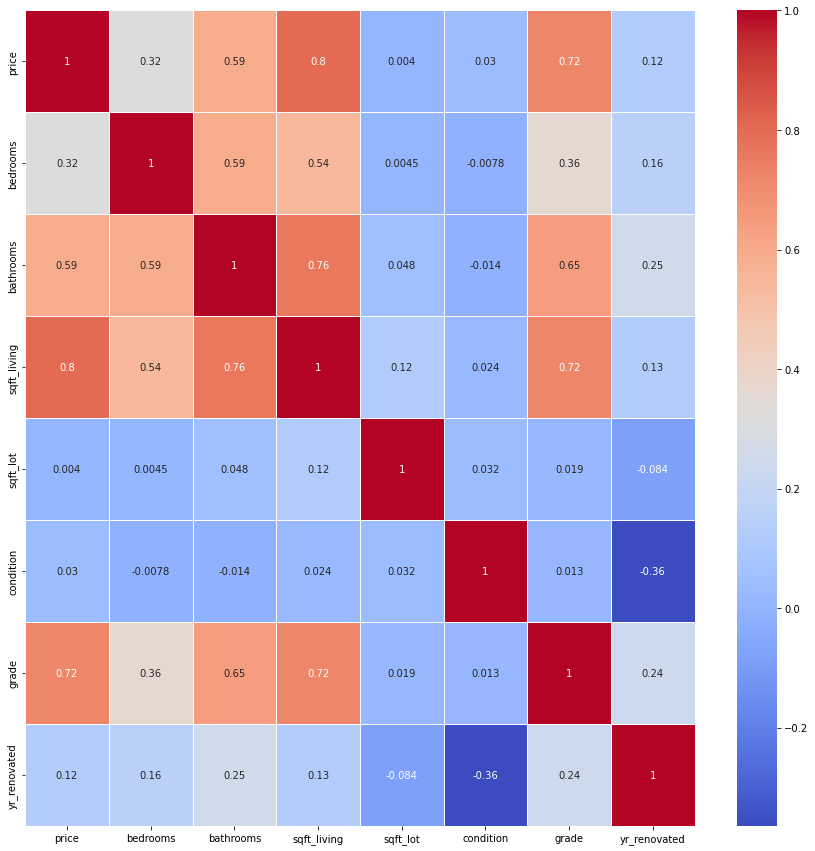

In [503]:
# draw the heatmap 
plt.figure(figsize = (15,15))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')


So in this correlation matrix and the resulting heatmap are notable positive relationships between:
- Price and: Living Space, grade and also bathrooms
- living space and: number of bedrooms, bathrooms and the grade of the house (as expected)

**However unfortunately no connection can be seen between the stated renovation years and the selling price from the dataset. This was a little unexpected but makes sense due to the strong limitation in data of renovation in the near past. This feature might be more meaningful for historical houses.**


#### 1. The number of rooms tend to contribute to the selling price
#### 2. The more actual living space the more the price increases

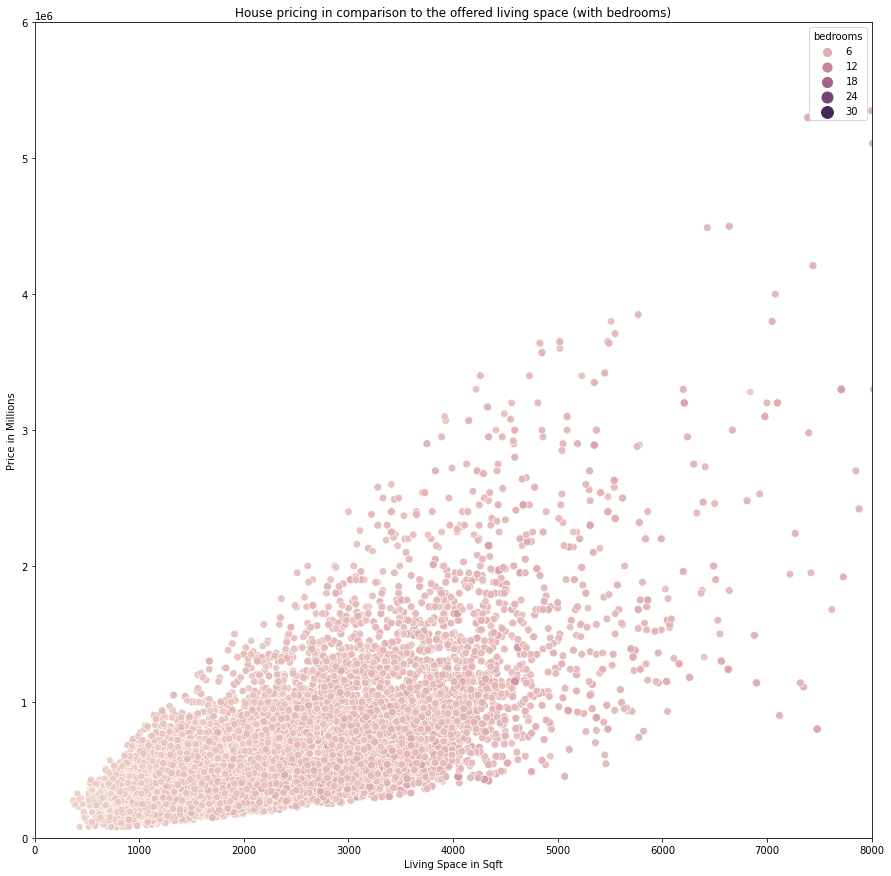

In [558]:
plt.figure(figsize = (15,15))
sns.scatterplot(x=houses.sqft_living, y=houses.price, hue=houses.bedrooms, size=houses.bedrooms, sizes=(50,150))

plt.title('House pricing in comparison to the offered living space (with bedrooms)')
plt.ylabel('Price in Millions')
plt.ylim(0,6e6)
plt.xlim(0, 8000)
plt.xlabel('Living Space in Sqft')
plt.show()

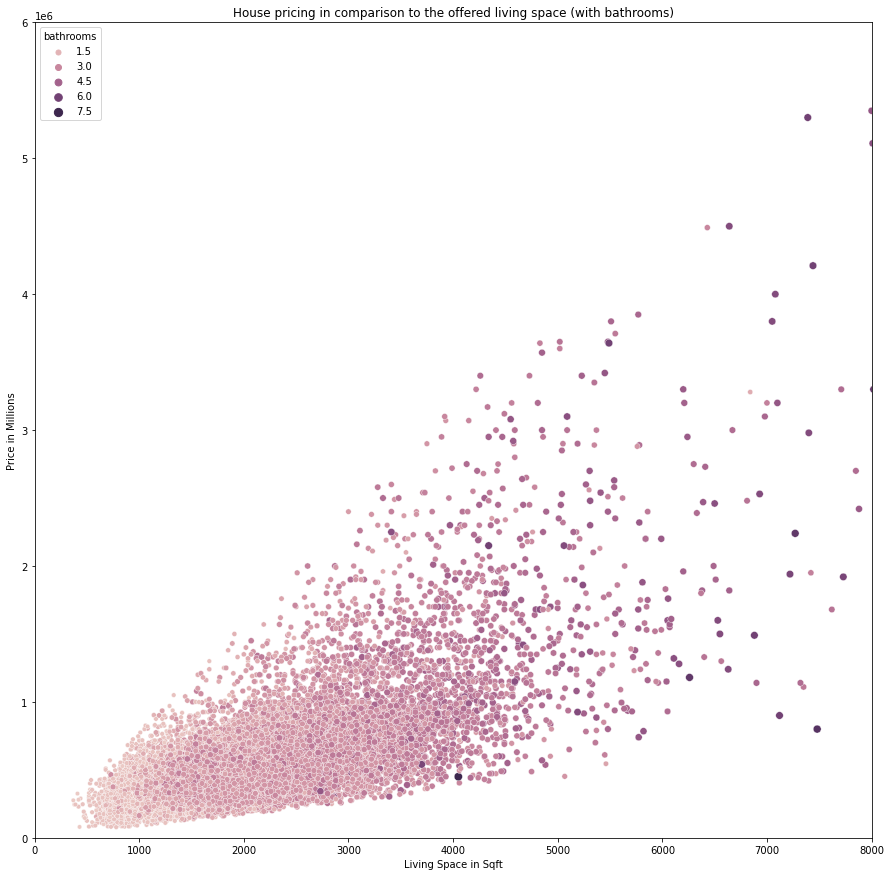

In [559]:
plt.figure(figsize = (15,15))
sns.scatterplot(x=houses.sqft_living, y=houses.price, hue=houses.bathrooms, size=houses.bathrooms)

plt.title('House pricing in comparison to the offered living space (with bathrooms)')
plt.ylabel('Price in Mil.$')
plt.ylim(0,6e6)
plt.xlim(0,8000)
plt.xlabel('Living Space in Sqft')
plt.show()

After looking at the scatter plot and obviously the correlation value, we can see that more actual living space leads to higher selling prices. Additionally we can see that higher numbers of bathrooms or bedrooms contribute to a higher selling price. In any case you can only see more bath-/or bedrooms in houses with more living space and houses with a higher selling price. I would estimate the Pearson correlation coefficient is somewhere in the range of 0.4 to 0.5 between bath- and bedrooms.
So, Yes. The number of rooms tend to contribute to the selling price and the more actual living space the more the price increases.

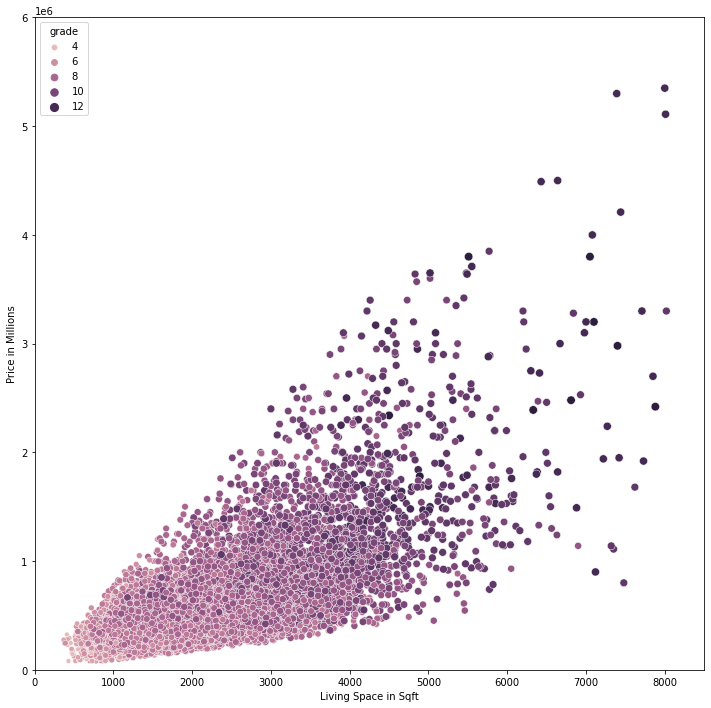

In [572]:
plt.figure(figsize = (12,12))
sns.scatterplot(x=df.sqft_living, y=houses.price, hue=houses.grade, size=houses.grade)
plt.ylabel('Price in Mil.$')
plt.ylim(0,6e6)
plt.xlim(0,8500)
plt.xlabel('Living Space in Sqft')
plt.show()

As stated before regarding the grades in the dataset, we can also see in this scatter plot that houses with a higher selling price tend to have a higher grade. We could also prove this with our correlation matrix before.

#### 5. There are times during the year in which selling prices tend to be higher

In order to give an answer to this hypothesis, we have to manipulate the date feature in the dataset a little bit, to be able to plot the price in the course of a year.
Therefore we add extra columns with the month and the year. Now we can calculate the mean price of a month as the most meaningful value to display over time.

In [ ]:
sns.set_theme(style="darkgrid")
#sns.set_xticks([1,3,5,7,9,11])
#sns.set_xticklabels(['Jan','March','May','Jul','Sep','Nov'])
sns.lineplot(data=houses, x="date", y="temp_max")

In [597]:
#little manipulation on the date to be able to plot a time course 
houses['Year'] = houses['date'].dt.year
houses['Month'] = houses['date'].dt.month
houses.head()
houses_2014 = houses.query('Year == 2014')
houses_2015 = houses.query('Year == 2015')
houses_2014

houses_2014_mean = houses_2014.groupby('Month').price.mean()
houses_2014_mean = houses_2014_mean.to_frame() 
houses_2014_mean.reset_index(inplace=True)
houses_2014_mean.head()

houses_2015_mean = houses_2015.groupby('Month').price.mean()
houses_2015_mean = houses_2015_mean.to_frame() #Pandaseries -> Dataframe; index = index
houses_2015_mean.reset_index(inplace=True)
houses_2015_mean.head()
#houses_2014_mean.head()


,Month,price
0,1,527074.021
1,2,508465.331
2,3,544333.371
3,4,564607.204
4,5,559631.429


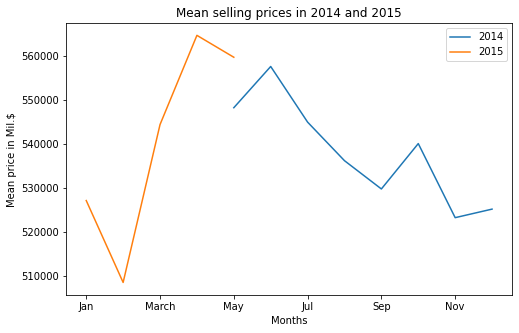

<Figure size 72x72 with 0 Axes>

In [600]:

fig, ax = plt.subplots()
ax.plot(houses_2014_mean.Month, houses_2014_mean.price)
ax.plot(houses_2015_mean.Month, houses_2015_mean.price)

fig.patch.set_facecolor('white')
plt.xlim() 
plt.legend(['2014', '2015'], loc='upper right')
plt.figure(figsize=(1,1))

ax.set_xlabel('Months')
ax.set_ylabel('Mean price in Mil.$')
ax.set_title('Mean selling prices in 2014 and 2015')
ax.set_xticks([1,3,5,7,9,11])
ax.set_xticklabels(['Jan','March','May','Jul','Sep','Nov'])
#ax.set_yticks([-1,0,1])
plt.show()

In the line plot with the mean price on the y-axis and the months of the year 2014 and 2015 we can clearly see, that the end and the beginning of the year is a bad time for selling you house. The demand decreases and so the prices.
On the contrary you can clearly see the prices increasing in the middle of the year with their **peak on april/may.** Throughout spring and summer the prices remain relatively stable. Therefore a recommended time to sell your house would then be towards spring, which was partly expected. However, it was less foreseeable that the end and beginning of the year would perform so poorly.
<br>

Nevertheless it is important to keep on mind, that we only have limited data resources for a few months, which makes the further time prediction very difficult.

#### 3. Depending on the location/zip-code there is a pattern in selling prices
To have a deeper look in the location based information of the dataset, we will plot them based on the specified geo data on an open street map.

In [621]:
# airport positions
fig = px.scatter_mapbox(houses, lat="lat", lon="long", hover_name="id", hover_data=["price", "sqft_living", "zipcode", "grade", "condition"],
                        #color_discrete_sequence=["red"], 
                        zoom=10, height=800, size= "price", size_max = 12, 
                        title="Location of the houses in King Country based on the geo data")



#background map
fig.update_layout(
    mapbox_style="open-street-map",)

fig.update_geos(fitbounds="locations")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

As we can clearly see in the map above, there is huge variety in locations of the houses in King Country. There are many of them located in the outskirts of the city which tend to be less pricier as we could expect from a huge city like Seattle. Also you can notice that the inner parts in the city (Bellevue, downtown...) next to the water area have especially high prices which are marked with big blue dots.
These houses also seem to have good grades as rating (>10) and an actual living space > 2000 Sqft.
<br>

In conclusion we can say:
- Yes there is a pattern in selling prices and the location of the house. In particular, the inner parts of the city, that are surrounded by water are in the higher price segment.
- We can also see the discovery from the box plot of the zip codes in this map. The area in north east of Bellevue around Medina has very high selling prices.

   
    So what can we deduce from the data for Bonnie Brown??
* Timing is indead an important fact! As shown in the line plot we can recommend a selling time between March-July. Better get ready early to be on top of the market!
* We have seen, that price depends on actual living space, number of rooms and the condition/grade of the house. Like i stated before, we assume the typical "middle class" to be in a range from 500.000 up to 700.000$
   * So Bonnie can't obviously change the location of her house, but she could do some repairing, painting of the walls and small improvements. 
   * She could also add some additional walls to increase the number of bath or bed room if she has enough living space in her house. 
   * If that's not the case she could start with adding some basement or roof space to it.
 * Because we were seeing, that a higher "grade" and "condition" tends to contribute to a higher selling price, she could speak to the data-collecting company to get more information on what their criteria for the grades are based on. At this point we can't see a clear difference for changes on middle class houses and the following price increase/decrease. If she has more information on that, she can start to calculate, which are the easiest and cheapest steps to increase her selling price by a good amount in a short time span. Up to this point i see no difference in improving the house condition of a middle class house in comparison to a high class house - except for the investment costs, which are on average much cheaper.


### Summary